In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [132]:
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

In [62]:
datagen

<module 'datagen' from '/home/ml-lab/Lay/pattern/Final_project/datagen.py'>

In [104]:
x,y = datagen.gaussian(spc=300)

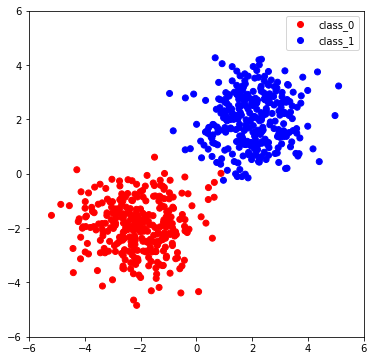

In [105]:
colors = ListedColormap(['red','blue'])
plt.figure(figsize=(6,6))
plt.xlim(-6,6)
plt.ylim(-6,6)
scatterplot = plt.scatter(x[:,0],x[:,1],c=y,cmap=colors)
plt.legend(handles=scatterplot.legend_elements()[0],labels=['class_0','class_1'])
#plt.title(title)
plt.show()

In [106]:
from sklearn.svm import SVC,LinearSVC

In [114]:
svm = SVC(C=1,kernel='linear').fit(x,y)

In [115]:
svm.support_vectors_[:, 0]

array([-1.49862458,  0.4334945 ,  0.64485187,  0.88300137, -0.21608147,
        1.4679901 ,  0.18644834, -0.39915266,  0.97087395])

#plt.clf()
colors_db = ['pink','cyan']
plt.figure(figsize=(10, 10))
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, cmap=colors,
            edgecolors='k')
x_min = -6
x_max = 6
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
#plt.figure(2, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap(colors_db))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

(-6, 6)

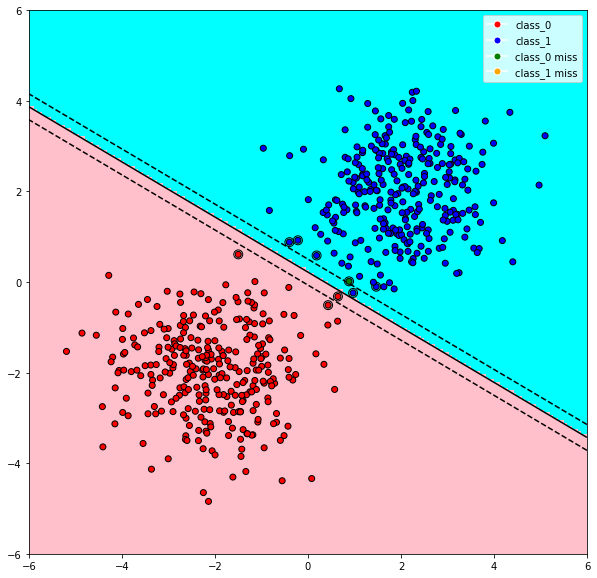

In [116]:
#plt.clf()
pred = svm.predict(x)
class_plot = y + ~(pred==y)*2 
colors_db = ['pink','cyan']
plt.figure(figsize=(10, 10))
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
#plt.scatter(x[:, 0], x[:, 1], c=y, zorder=10, cmap=colors,
#            edgecolors='k')
colors_dict = {0:'red',1:'blue',2:'green',3:'orange'}
colors = ListedColormap(['red','blue','green','orange'])
scatter = plt.scatter(x[:,0],x[:,1],c=[colors_dict[i] for i in class_plot],cmap=colors,label=class_plot,zorder=10,edgecolors='k')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='class_0',markerfacecolor='red', markersize=7),
               Line2D([0], [0], marker='o', color='w', label='class_1',markerfacecolor='blue', markersize=7),
               Line2D([0], [0], marker='o', color='w', label='class_0 miss',markerfacecolor='green', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='class_1 miss',markerfacecolor='orange', markersize=7)
                     ]
plt.legend(handles=legend_elements)
x_min = -6
x_max = 6
y_min = -6
y_max = 6

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
#plt.figure(2, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=ListedColormap(colors_db))
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [117]:
from layyer.discodef.mnist_model import *
from layyer.discodef.getData import *

In [120]:
from torchsummary import summary

In [118]:
base_model = torch.load('./mnist_model/mnistModel_C.pth')

In [122]:
summary(base_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
            Conv2d-2           [-1, 64, 12, 12]         204,864
            Linear-3                  [-1, 120]       1,106,040
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 1,323,198
Trainable params: 1,323,198
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.84
Params size (MB): 5.05
Estimated Total Size (MB): 5.89
----------------------------------------------------------------


In [130]:
base_model.parameters()

TypeError: 'generator' object is not subscriptable